Intro To Data Science 2 HW

In [2]:
# !pip install roboflow

In [3]:
!pip uninstall ultralytics

^C


In [4]:
from roboflow import Roboflow
import os
from PIL import Image
import os
import json
import math
import pandas as pd
import ast

In [5]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('samplesubmissionAllZeros.csv')

# Get unique values from the "Sample" column
test_images = df['Sample'].unique()
test_images

array(['92abe65fd725ece61ffa88d1cc431f42',
       '92dcfc500a608b70fef7ccf0bf3f0956',
       '939f83c78db23778ab0402fcd8345aa7',
       '9493cb84f66669489115c65eea376be5',
       '94a6d044337add56e7f8bafbe78ee279',
       '97af74d71ff657f4fdf26c5083527581',
       '988cfc2d224b3c3b6343f50cbce99f81',
       '990dac0da552967b90ab19693238fa1d',
       '9a133bb54b65807a32953bc899c309ed',
       '9a2c9e600e0594277d93364f4681461f',
       '9a7189243768e8003e13aba617b76c8f',
       '9a7ddd39fb6c0969dba8e4598cc47e20',
       '9c0c91ee173954c509ce0b732b7b45f3',
       '9c0f15d4ac69b055a7b702e2876543c2',
       '9dec9d94c30315f7ab01961b8518844e',
       '9ec57fb82008ac9ac920e1e9d58ec146',
       '9f340be42d46eb466f6f3279056c9be9',
       '9f6e4b18f43b197cae032dd1ad6e8686',
       '9f8404a3e4f55a0cf7a2598127376ba1',
       'a34d6b10c98b8541480943c53ae8e1bf',
       'a37fcc92fce053a3fc4dc9bb1cb4918c',
       'a4f3a139ac6ed916e841c5863bf201d3',
       'a596e56e91e6bce1e143fdd7c55338e4',
       'a59

In [60]:
# Trainging images

import os
import glob

folder = "orig_images"

# iterate over all image files in the folder
for filename in glob.glob(folder + '/*'):
    # check each string in the list
    for s in test_images:
        # if the string is in the filename
        if s in filename:
            # delete the file
            os.remove(filename)
            print(f'Deleted: {filename}')
            # no need to check the other strings
            break

Deleted: orig_images\92abe65fd725ece61ffa88d1cc431f42_orig.jpg
Deleted: orig_images\92dcfc500a608b70fef7ccf0bf3f0956_orig.jpg
Deleted: orig_images\939f83c78db23778ab0402fcd8345aa7_orig.jpg
Deleted: orig_images\9493cb84f66669489115c65eea376be5_orig.jpg
Deleted: orig_images\94a6d044337add56e7f8bafbe78ee279_orig.jpg
Deleted: orig_images\97af74d71ff657f4fdf26c5083527581_orig.jpg
Deleted: orig_images\988cfc2d224b3c3b6343f50cbce99f81_orig.jpg
Deleted: orig_images\990dac0da552967b90ab19693238fa1d_orig.jpg
Deleted: orig_images\9a133bb54b65807a32953bc899c309ed_orig.jpg
Deleted: orig_images\9a2c9e600e0594277d93364f4681461f_orig.jpg
Deleted: orig_images\9a7189243768e8003e13aba617b76c8f_orig.jpg
Deleted: orig_images\9a7ddd39fb6c0969dba8e4598cc47e20_orig.jpg
Deleted: orig_images\9c0c91ee173954c509ce0b732b7b45f3_orig.jpg
Deleted: orig_images\9c0f15d4ac69b055a7b702e2876543c2_orig.jpg
Deleted: orig_images\9dec9d94c30315f7ab01961b8518844e_orig.jpg
Deleted: orig_images\9ec57fb82008ac9ac920e1e9d58ec146_o

In [61]:
def save_player_images(predictions, image_path):
    # Open the original image
    original_image = Image.open(image_path)

    # Create a folder to save the sub-images in
    folder_name = "player_detections/" + os.path.splitext(os.path.basename(image_path))[0]
    os.makedirs(folder_name, exist_ok=True)

    # Loop through the predictions in the dictionary
    for prediction in predictions['predictions']:
        if prediction['class'] == 'player':
            # Extract the sub-image using the coordinates
            x = prediction['x'] - (prediction['width'] / 2)
            y = prediction['y'] - (prediction['height'] / 2)
            w = prediction['width']
            h = prediction['height']
            sub_image = original_image.crop((x, y, x + w, y + h))

            # Save the sub-image with a unique name based on its coordinates
            filename = f"{folder_name}/{os.path.splitext(os.path.basename(image_path))[0]}_{x}_{y}_{w}_{h}.jpg"
            sub_image.save(filename)

In [62]:
def predict_players(test_images, folder_path, player_model, confidence=40, overlap=30):

    # Loop over all JPEG images in the folder
    for filename in os.listdir(folder_path):
        if filename.lower().endswith('.jpg'):
            
            # Get the ID of the image without the extension
            image_id = filename.split('_')[0]

            # Check if the image ID is in the valid IDs array
            if image_id not in test_images:
                # Apply the model to the image and store the prediction in the dictionary
                image_path = os.path.join(folder_path, filename)
                print(image_path)
                predictions_json = player_model.predict(image_path).json()
                # visualize your prediction
                save_player_images(predictions_json, image_path)

In [63]:
rf = Roboflow(api_key="clKb8cQfpkHx4L5aslqG")
project = rf.workspace().project("football-players-detection-3zvbc")
model = project.version(2).model

loading Roboflow workspace...
loading Roboflow project...


In [64]:
predict_players(test_images, "orig_images", model)

orig_images\001e3a4188ec3e4e4d7be5b3c1a10b12_orig.jpg
orig_images\00306bd09a0ebe94049342b0dc5bcf77_orig.jpg
orig_images\00387bfd923637542deef81e84a30f69_orig.jpg
orig_images\0073053bc8a8dec7ee638c77fd9e2a7d_orig.jpg
orig_images\00a5dcd68d3c1a286515a340c879df7d_orig.jpg
orig_images\00daec3a9fe691d0ab642f25254ff13a_orig.jpg
orig_images\0268f03a5da4079bceff207231596544_orig.jpg
orig_images\028eae0e1dbbc7885416779106946626_orig.jpg
orig_images\02e124287dae20ea21cdd8b63485a90e_orig.jpg
orig_images\0357cd8293843920485336a8f1ed6119_orig.jpg
orig_images\03cef0d91d59286d2e5297f561e9a2e9_orig.jpg
orig_images\0402f70064f98da28ec14c1e50a3ba7d_orig.jpg
orig_images\0427c28c2e4d2b9429772b014987a405_orig.jpg
orig_images\0498fc0ce047765f1f8311ebd0812b10_orig.jpg
orig_images\05716a437c940fbbe75876238c863068_orig.jpg
orig_images\0593e32cd37772d19de0fd5a187cdf5b_orig.jpg
orig_images\078cc252d58c82831540f404d79682e4_orig.jpg
orig_images\086c0fe001f98fd3fdc088e4dee5ffce_orig.jpg
orig_images\0911174b752aa864

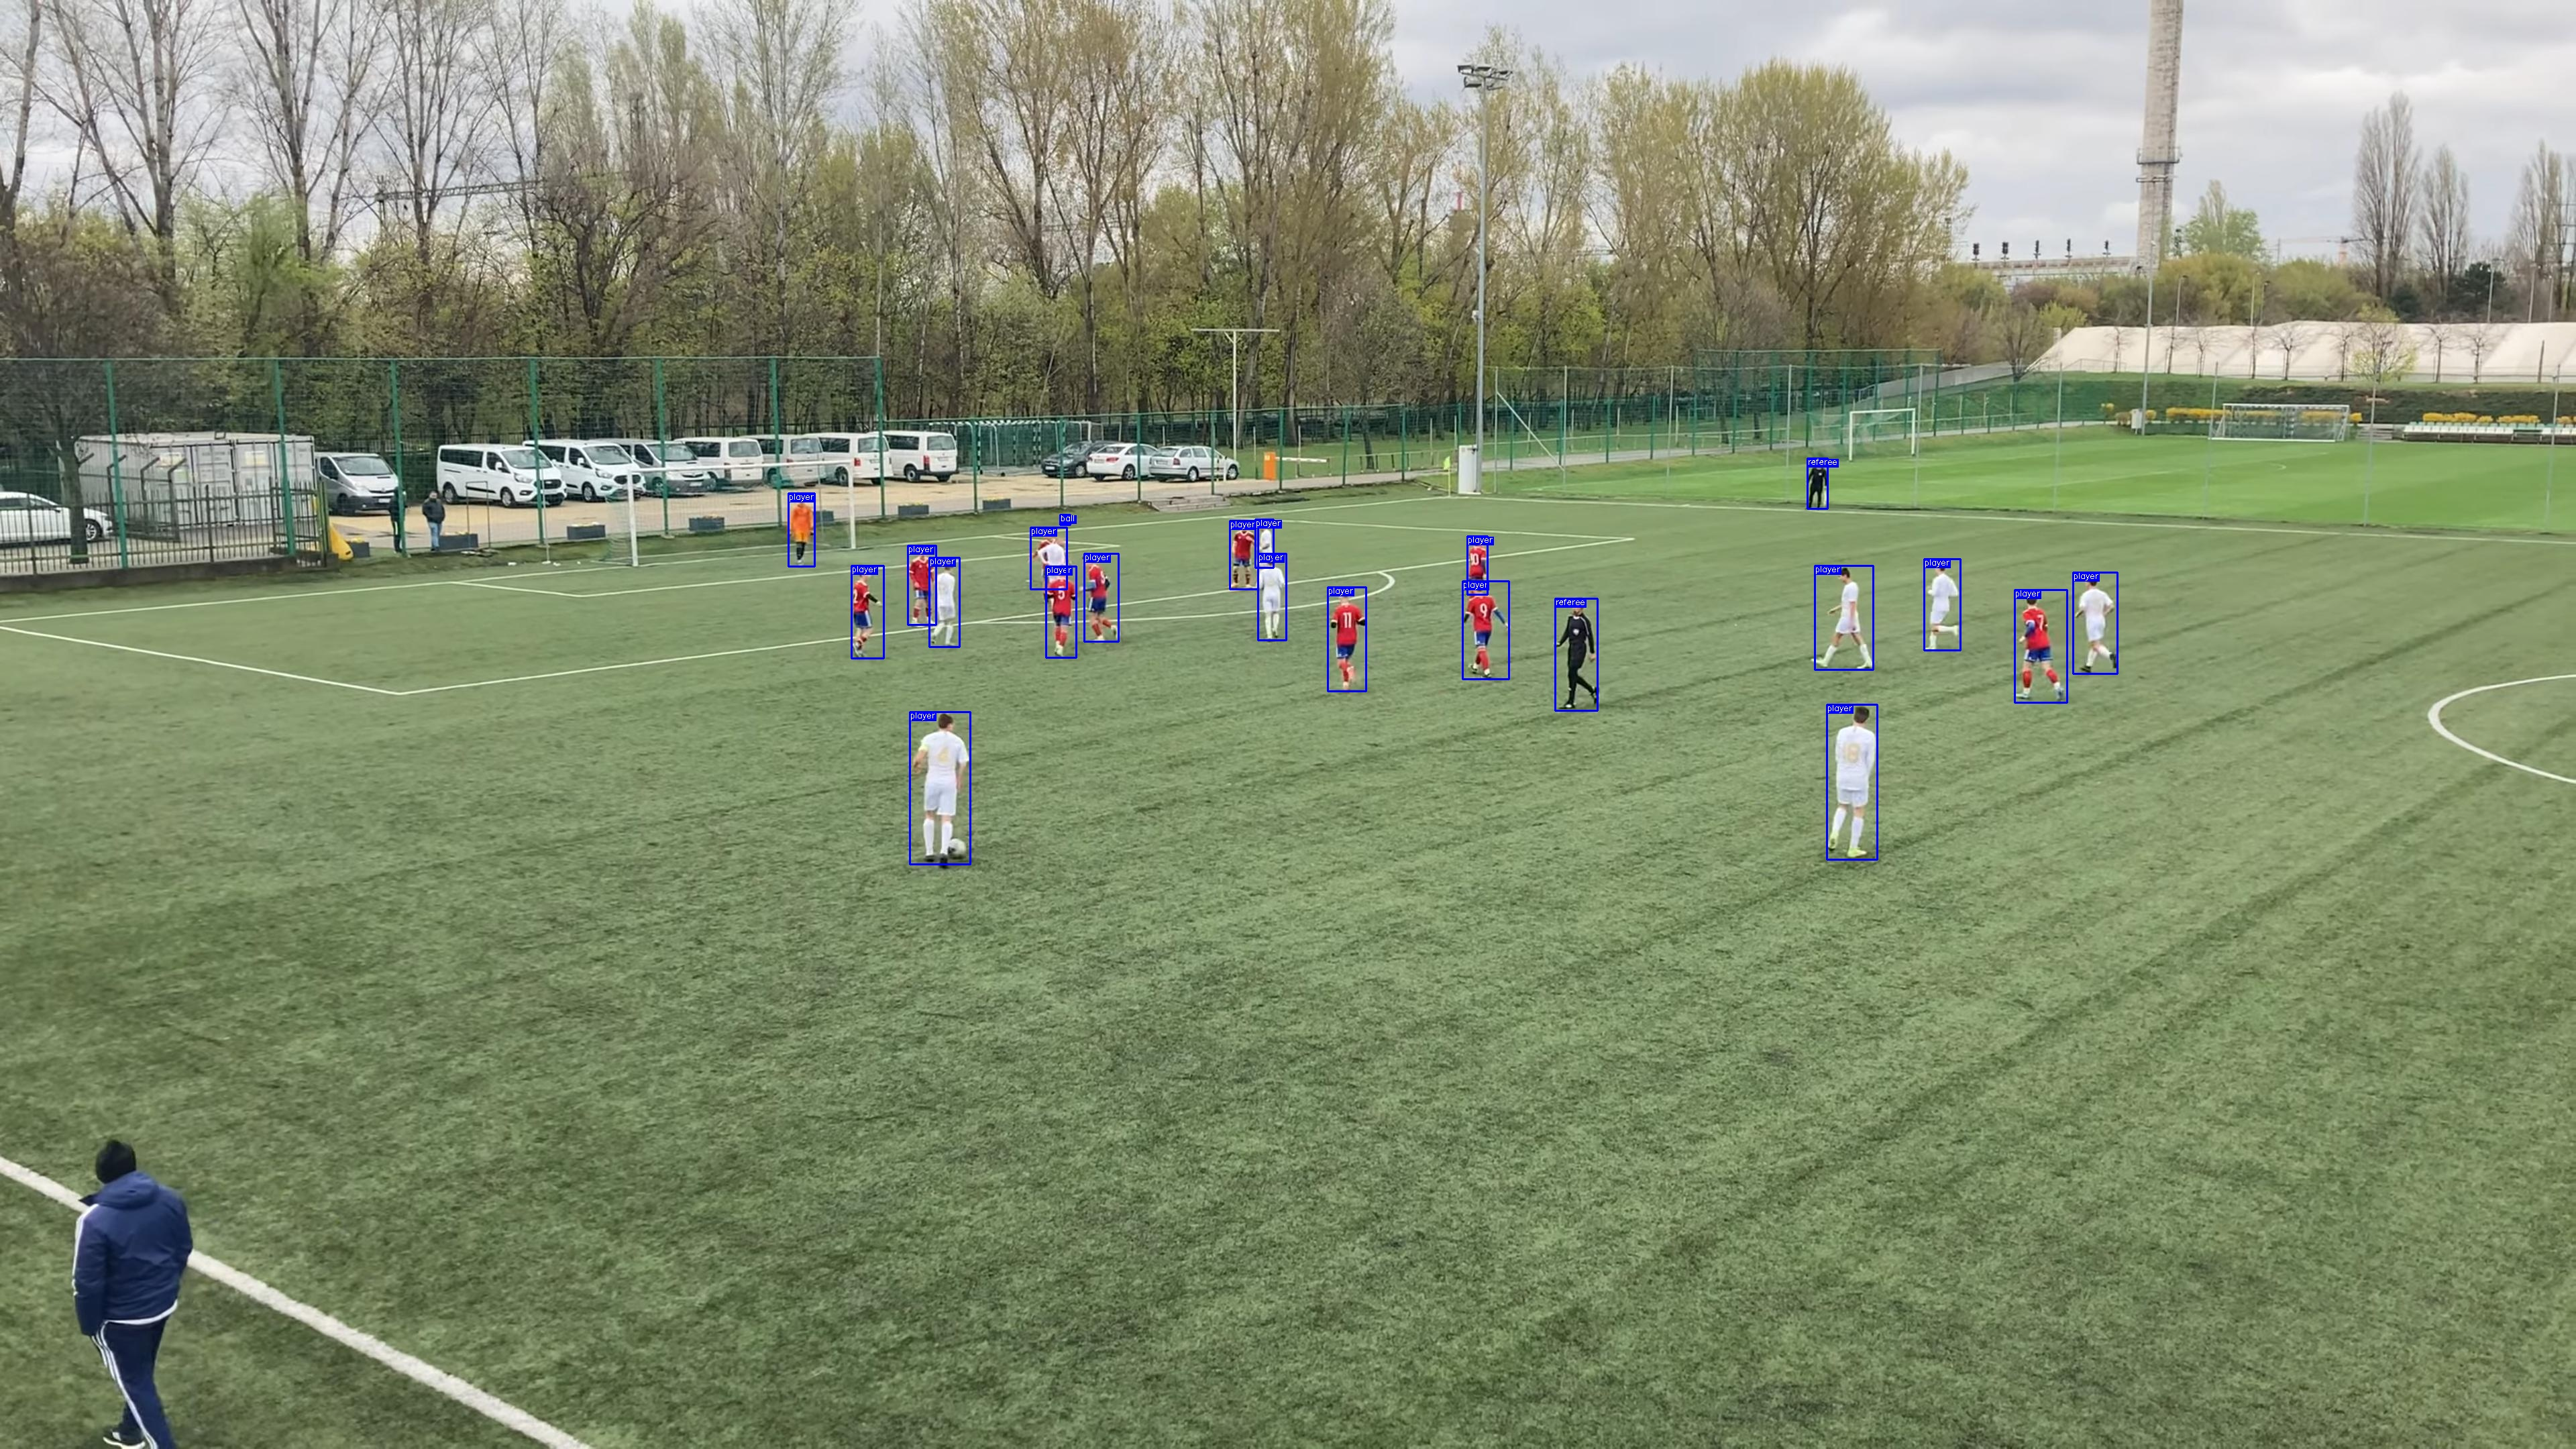

In [82]:
# Display the image
display(Image(filename="prediction.jpg"))

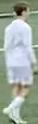

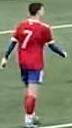

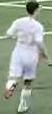

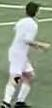

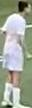

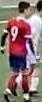

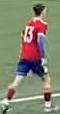

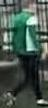

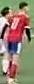

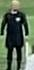

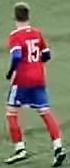

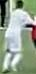

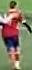

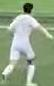

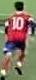

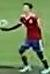

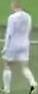

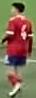

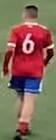

In [79]:
import os
from IPython.display import Image, display
    
# Path to the folder containing the pictures
folder_path = 'player_detections/00a5dcd68d3c1a286515a340c879df7d_orig'

# Get the list of files in the folder and subfolders
for root, dirs, files in os.walk(folder_path):
    for filename in files:
        if filename.lower().endswith('.jpg'):
            # Construct the image path
            image_path = os.path.join(root, filename)
            
            # Display the image
            display(Image(filename=image_path))

In [45]:
def predict_jersey_numbers(folder_path, confidence=40, overlap=30):
    # Initialize the Roboflow API client
    rf = Roboflow(api_key="clKb8cQfpkHx4L5aslqG")
    project = rf.workspace().project("player-numbers")
    model = project.version(4).model

    # Create an empty dictionary to store the predictions
    predictions = {}

    # Loop over all subdirectories and JPEG images in the folder
    for root, _, files in os.walk(folder_path):
        for filename in files:
            if filename.lower().endswith('.jpg'):
                # Apply the model to the image and store the prediction in the dictionary
                image_path = os.path.join(root, filename)
                prediction = model.predict(image_path, confidence=confidence, overlap=overlap).json()
                
                print(prediction)
                
                pred_dict = {}
                for pred in prediction['predictions']:
                    class_value = pred['class']
                    confidence_value = pred['confidence']
                    if class_value == "10":
                        pred_dict[class_value] = confidence_value
                if pred_dict:  # Only add the prediction dictionary if it's not empty
                    predictions[filename] = pred_dict

    # Return the dictionary of predictions
    return predictions

In [46]:
def get_sub_pictures(x, y, width, height):
    # Size of each sub-picture
    sub_pic_width = 3840 // 16
    sub_pic_height = 2160 // 9

    # Calculate the range of sub-pictures that the rectangle overlaps
    left = x // sub_pic_width
    right = (x + width) // sub_pic_width
    top = y // sub_pic_height
    bottom = (y + height) // sub_pic_height

    sub_pictures = []

    # Iterate over the range of sub-pictures
    for i in range(math.ceil(top), math.ceil(bottom) + 1):
        for j in range(math.ceil(left), math.ceil(right) + 1):
            # Calculate the sub-picture number and add it to the list
            sub_picture = i * 16 + j + 1
            sub_pictures.append(sub_picture)

    return sub_pictures

In [47]:
def parse_json(json_str):
    # Parse the JSON string into a Python dictionary
    data = json.loads(json_str)

    coordinates = []

    # Iterate over the keys in the dictionary
    for file_name in data.keys():
        # Split the file name into parts
        parts = file_name.split('_')

        # Extract the name, x, y, width, and height values
        name = parts[0]
        x = float(parts[2])
        y = float(parts[3])
        width = int(parts[4])
        height = int(parts[5].split('.')[0])  # Remove the file extension

        coordinates.append((name, x, y, width, height))

    return coordinates

In [48]:
predictions_dict = predict_jersey_numbers("player_detections")

loading Roboflow workspace...
loading Roboflow project...


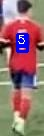

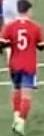

In [83]:
# Display the image
display(Image(filename="number_prediction.jpg"))
display(Image(filename="player_1559.5_844.0_45_136.jpg"))

In [80]:
predictions_dict

{'001e3a4188ec3e4e4d7be5b3c1a10b12_orig_462.0_990.5_78_183.jpg': {'10': 0.694049060344696},
 '00387bfd923637542deef81e84a30f69_orig_1899.0_579.0_48_94.jpg': {'10': 0.5763329863548279},
 '00387bfd923637542deef81e84a30f69_orig_2160.0_639.0_54_114.jpg': {'10': 0.6130676865577698},
 '0073053bc8a8dec7ee638c77fd9e2a7d_orig_3692.5_1278.5_87_165.jpg': {'10': 0.5541111826896667},
 '00a5dcd68d3c1a286515a340c879df7d_orig_1173.0_909.0_72_128.jpg': {'10': 0.6166995763778687},
 '00a5dcd68d3c1a286515a340c879df7d_orig_1548.0_852.0_42_102.jpg': {'10': 0.79190993309021},
 '00a5dcd68d3c1a286515a340c879df7d_orig_1677.0_874.0_60_114.jpg': {'10': 0.754643440246582},
 '00a5dcd68d3c1a286515a340c879df7d_orig_2366.5_978.5_69_167.jpg': {'10': 0.6270744204521179},
 '00a5dcd68d3c1a286515a340c879df7d_orig_3420.0_836.5_36_97.jpg': {'10': 0.5578269362449646},
 '00a5dcd68d3c1a286515a340c879df7d_orig_3551.5_928.0_57_140.jpg': {'10': 0.6373500227928162},
 '00daec3a9fe691d0ab642f25254ff13a_orig_1598.5_956.0_57_150.jpg': 

In [49]:
prediction_json = json.dumps(predictions_dict, indent=4)
coordinates = parse_json(prediction_json)

In [50]:
coordinates

[('001e3a4188ec3e4e4d7be5b3c1a10b12', 462.0, 990.5, 78, 183),
 ('00387bfd923637542deef81e84a30f69', 1899.0, 579.0, 48, 94),
 ('00387bfd923637542deef81e84a30f69', 2160.0, 639.0, 54, 114),
 ('0073053bc8a8dec7ee638c77fd9e2a7d', 3692.5, 1278.5, 87, 165),
 ('00a5dcd68d3c1a286515a340c879df7d', 1173.0, 909.0, 72, 128),
 ('00a5dcd68d3c1a286515a340c879df7d', 1548.0, 852.0, 42, 102),
 ('00a5dcd68d3c1a286515a340c879df7d', 1677.0, 874.0, 60, 114),
 ('00a5dcd68d3c1a286515a340c879df7d', 2366.5, 978.5, 69, 167),
 ('00a5dcd68d3c1a286515a340c879df7d', 3420.0, 836.5, 36, 97),
 ('00a5dcd68d3c1a286515a340c879df7d', 3551.5, 928.0, 57, 140),
 ('00daec3a9fe691d0ab642f25254ff13a', 1598.5, 956.0, 57, 150),
 ('00daec3a9fe691d0ab642f25254ff13a', 1938.0, 857.0, 48, 106),
 ('00daec3a9fe691d0ab642f25254ff13a', 473.5, 858.5, 57, 123),
 ('0268f03a5da4079bceff207231596544', 2292.0, 921.0, 90, 222),
 ('028eae0e1dbbc7885416779106946626', 2085.0, 1039.5, 42, 109),
 ('028eae0e1dbbc7885416779106946626', 2339.5, 1114.0, 51,

In [51]:
data = []

for coord in coordinates:
    name, x, y, width, height = coord
    sub_pictures = get_sub_pictures(x, y, width, height)
    print(name, sub_pictures)
    for s in sub_pictures:
        df.loc[(df['Sample'] == name) & (df['Label'] == s), 'Predicted'] = True
    

001e3a4188ec3e4e4d7be5b3c1a10b12 [66, 67]
00387bfd923637542deef81e84a30f69 [40, 41]
00387bfd923637542deef81e84a30f69 [42, 58]
0073053bc8a8dec7ee638c77fd9e2a7d [96, 112]
00a5dcd68d3c1a286515a340c879df7d [53, 54, 69, 70]
00a5dcd68d3c1a286515a340c879df7d [55]
00a5dcd68d3c1a286515a340c879df7d [55, 56, 71, 72]
00a5dcd68d3c1a286515a340c879df7d [74, 75]
00a5dcd68d3c1a286515a340c879df7d [63]
00a5dcd68d3c1a286515a340c879df7d [63, 64, 79, 80]
00daec3a9fe691d0ab642f25254ff13a [55, 71]
00daec3a9fe691d0ab642f25254ff13a [57, 73]
00daec3a9fe691d0ab642f25254ff13a [50, 51, 66, 67]
0268f03a5da4079bceff207231596544 [58, 74]
028eae0e1dbbc7885416779106946626 [73]
028eae0e1dbbc7885416779106946626 [74, 90]
02e124287dae20ea21cdd8b63485a90e [55, 71]
02e124287dae20ea21cdd8b63485a90e [68, 84]
0357cd8293843920485336a8f1ed6119 [70]
0357cd8293843920485336a8f1ed6119 [55, 71]
0357cd8293843920485336a8f1ed6119 [71, 72, 87, 88]
0357cd8293843920485336a8f1ed6119 [78]
03cef0d91d59286d2e5297f561e9a2e9 [70, 86]
0498fc0ce0477

In [65]:
df

,Id,Sample,Label,Predicted
0,92abe65fd725ece61ffa88d1cc431f42-1,92abe65fd725ece61ffa88d1cc431f42,1,False
1,92abe65fd725ece61ffa88d1cc431f42-2,92abe65fd725ece61ffa88d1cc431f42,2,False
2,92abe65fd725ece61ffa88d1cc431f42-3,92abe65fd725ece61ffa88d1cc431f42,3,False
3,92abe65fd725ece61ffa88d1cc431f42-4,92abe65fd725ece61ffa88d1cc431f42,4,False
4,92abe65fd725ece61ffa88d1cc431f42-5,92abe65fd725ece61ffa88d1cc431f42,5,False
...,...,...,...,...
19147,ff0f422b5e24e48c7afc660964aecd02-140,ff0f422b5e24e48c7afc660964aecd02,140,False
19148,ff0f422b5e24e48c7afc660964aecd02-141,ff0f422b5e24e48c7afc660964aecd02,141,False
19149,ff0f422b5e24e48c7afc660964aecd02-142,ff0f422b5e24e48c7afc660964aecd02,142,False
19150,ff0f422b5e24e48c7afc660964aecd02-143,ff0f422b5e24e48c7afc660964aecd02,143,False


In [86]:
df.to_csv('output.csv', index=False)